### Hebbian learning and PCA

The basic hebbian learing rule is considering the weight change as a function of correlation between pre- and post- synaptic activity. For the weight connecting the $i$ th input neuron to output neuron, the updating rule of synaptic weight could be written in the format of: 
$\delta w_i = \eta V \epsilon_i $

, where $V$ is the post-synaptic neuron firing, $w_i$ is the weights of the $i$ th neuronal input,$\epsilon_i$ is the $i$ th input. 

If $V$ is a linear function of $\epsilon$ and change of $w$ happens in a longer time scale comparing with the input dynamics, we could write the learing rule as:

$\delta w_i = <\Sigma_j w_j \epsilon_j \epsilon_i> = \Sigma_j w <\epsilon_j \epsilon_i> = \Sigma_j C_{ij} w_i $
,where $C = <\epsilon \epsilon^T>$

We could write in the way of linear algebra as $\delta w = Cw $
Given that C is symmetric and real valued vector, we conducted eigen decompositino of $C$ into $C = E \Lambda E^T$

If we denote $v = E^T w$, then $\delta v = E \delta w = E^T Cw =E^T E \Lambda E^T w =\Lambda v   $. 

Therefore, for each $v_i$ in $v$, $v_i = v_i(0) e^{\lambda_i t}$ -- eq(1)


$v_i$ is the length on the $i$ th eigen vector. And the synaptic weight will just be $v$ rotated back according to the eigen vector matrix.

### Learning with traditional hebbian PCA with enforced unit length

['D2', 'D1']


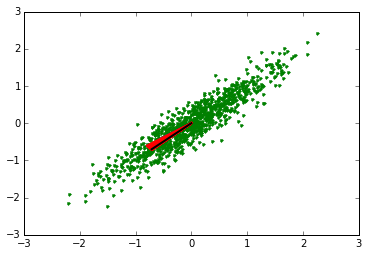

In [174]:
%reset -f
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
from numpy import linalg as LA

# you must first load data2d.npz
d = np.load('data2d.npz')
print(list(d.keys()))
D1,D2 = d['D1'],d['D2']

# remove the mean
D1[0,:] = D1[0,:]-np.average(D1[0,:])
D1[1,:] = D1[1,:]-np.average(D1[1,:])
# data array
X=D1;

N,K=X.shape;

# plot data
plt.plot(X[0,:],X[1,:],'g.')           
#axis xy, axis image
#hold on

# initialize weights
w=np.random.randn(N,1);        

# plot weight vector
h=plt.plot([0,w[0]],[0,w[1]],'b',linewidth=2);  

# Number of iterations for learining 
Ite =50

# Learning rate
A = 0.0001;

# Calculate the covariance matrix
C = np.dot(D1,D1.T)
# Calculate eigen value and eigen vector
amp, vC = LA.eig(C)

w_train = np.empty([Ite,2])
w_train[0,:]=w.T

V = np.dot(w.T,D1);

for i in range(1,Ite):
        dw = A*np.dot(D1,V.T)
        w_train[i,:]= w.T
        w = w+dw
#        w_train_temp = w_train_temp.T
        V = np.dot(w.T,D1)
# Normalization of length for visualization
        h=plt.plot([0,w_train[i,0]/LA.norm(w_train[i,:])],[0,w_train[i,1]/LA.norm(w_train[i,:])],'r',linewidth=2)
#        h=plt.plot([0,w_train[i,0]],[0,w_train[i,1]],'r',linewidth=2)
 
h= plt.plot([0,vC[0,0]],[0,vC[0,1]],'k',linewidth=2);
     # plot the learnt weight vector


The way that we did the above hebbian plasticity is through repeatedly projecting the inputs onto the output with updated weights, and then updating the weights through correlation between input and output.To get the above results, we have normalized the vector length. If we used a nonmodified version of hebbian plasticity, the length of the trained variable will explode.

### Learning with Oja's rule leads to unit length of learnt weight

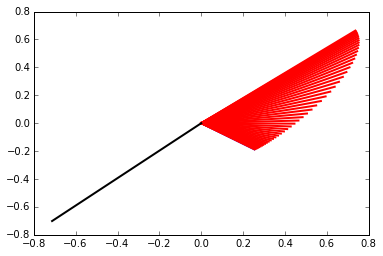

In [283]:
# initialize weights
w=np.random.randn(N,1);        

# plot weight vector
h=plt.plot([0,w[0]],[0,w[1]],'b',linewidth=2);  

w_train = np.empty([Ite,2])
w_train[0,:]=w.T

V = np.dot(w.T,D1);

for i in range(1,Ite):
# implementing Oja's rule
        dw = A*np.dot(D1-np.dot(w,V),V.T)
        w_train[i,:]= w.T
        w = w+dw
#        w_train_temp = w_train_temp.T
        V = np.dot(w.T,D1)
# Normalization of length for visualization
        h=plt.plot([0,w_train[i,0]],[0,w_train[i,1]],'r',linewidth=2)
 
h= plt.plot([0,vC[0,0]],[0,vC[0,1]],'k',linewidth=2);
     # plot the learnt weight vector


### Application of Sanger's rule to learn both the two principle component

['D2', 'D1']


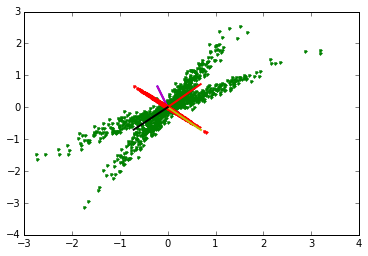

In [5]:
%reset -f
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
from numpy import linalg as LA

# you must first load data2d.npz
d = np.load('data2d.npz')
print(list(d.keys()))
D2,D1 = d['D1'],d['D2']



# remove the mean
D1[0,:] = D1[0,:]-np.average(D1[0,:])
D1[1,:] = D1[1,:]-np.average(D1[1,:])
# data array
X=D1;

N,K=X.shape;

# plot data
plt.plot(X[0,:],X[1,:],'g.')           
#axis xy, axis image
#hold on


# Number of iterations for learining 
Ite =50
It2 =50


# Learning rate
A = 0.0001;
A2 =0.001

# Calculate the covariance matrix
C = np.dot(D1,D1.T)
# Calculate eigen value and eigen vector
amp, vC = LA.eig(C)


# Initialize weights for the two postsynaptic neurons
w1=np.random.randn(N,1);        

# plot weight vector
h=plt.plot([0,w1[0]],[0,w1[1]],'b',linewidth=2);  
h=plt.plot([0,w1[0]],[0,w1[1]],'m',linewidth=2);  

w_train1 = np.empty([Ite,2])
w_train1[0,:]=w1.T

w_train2 = np.empty([Ite,2])

V1 = np.dot(w1.T,D1);

for i in range(1,Ite):
# implementing Oja's rule
        dw1 = A*np.dot(D1-np.dot(w1,V1),V1.T)
        w_train1[i,:]= w1.T
        w1 = w1+dw1
        V1 = np.dot(w1.T,D1)
        
D3 = D1-np.dot(w1,V1)
X=D3;
plt.plot(X[0,:],X[1,:],'r.') 
w2=np.random.randn(N,1);        
V2 = np.dot(w2.T,D3);
w_train2[0,:]=w2.T


for j in range(1,Ite):
        dw2 = A2*np.dot(D3-np.dot(w2,V2),V2.T)
        w_train2[j,:]= w2.T
        w2 = w2+dw2
#        w_train_temp = w_train_temp.T
        V2 = np.dot(w2.T,D3)

h=plt.plot([0,w_train2[i,0]],[0,w_train2[i,1]],'y',linewidth=2)
# Normalization of length for visualization
h=plt.plot([0,w_train1[i,0]],[0,w_train1[i,1]],'r',linewidth=2)
h= plt.plot([0,vC[0,0]],[0,vC[0,1]],'k',linewidth=2);
     # plot the learnt weight vector



At the figure above, green dots are the original 2D data; black is the first principle component of covariance matrix of the data, red line is the converged weight director; purple line is the original weigths for principle component2, yellow is the finally converged principle component number 2.

['faces2']


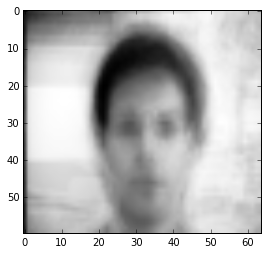

In [24]:
%reset -f
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
from numpy import linalg as LA

# you must first load data2d.npz
# after loading, npz become dictionary files
faces2 = np.load('faces2.npz')

# Visualize the keys of the dictionary
print(list(faces2.keys()))
for key in faces2:
    faces = faces2[key]
    
# Reshape data
Row_face,Column_face = faces.shape
faces_data = np.empty([Row_face,Column_face])

# Initialize variables for storing reshaped images
faces_tmp = np.zeros((64,60,Column_face))
faces_tmp2 = np.zeros((64,60,Column_face))

for i in range(0,Column_face-1):
    faces_tmp[:,:,i]= np.reshape(faces[:,i],(64,60))

# Calculate average face
faces_ave = np.mean(faces_tmp,axis = 2)
# Subtract average face
for i in range(0,Column_face-1):
    faces_tmp2[:,:,i]= faces_tmp[:,:,i] - faces_ave
    faces_data_tmp= np.reshape(faces_tmp2[:,:,i],(3840,1))
    faces_data[:,i] = faces_data_tmp.T

# Plot the average face
plt.imshow(faces_ave.T,cmap='Greys_r')

In [248]:
faces_data.shape

(3840, 48)

In [40]:
# Use Sanger's rule to learn the first 2 principle components of the faces

# Initilization for weight matrix of principle component1 
X,Y = faces_data.shape
# X = 3840
# Y = 48

# Analyze 16 components
w = np.random.rand(16,X)
# W: 16,3840

# Calculate initial activity
V = np.zeros((16,Y))
# V: 16,48

# Iteration length
Ite = 5000

# Learning rate
A = 0.000000000005
#w1_tmp = np.empty([Ite,X])

# Conduct Sanger's rule training
# Calculate the weights that correspond to every principle components
w_2D = np.zeros([64,60,16])

# Before calculating any principle components, data is the original data
faces_sub = faces_data

for j in range(0,15):
    for i in range(0,Ite-1):
        V[j,:] = np.dot(w[j,:][None,:],faces_sub)
        tmp = faces_sub - np.dot(w[j,:][:,None],V[j,:][None,:])
        dw1 = np.dot(tmp,V[j,:][:,None])
        w[j,:] = w[j,:]+A*dw1.T
    faces_sub = faces_sub - np.dot(w[j,:][:,None],V[j,:][None,:])
    
# faces_data = faces_data - np.dot(w[j,:][:,None],V[j,:][None,:]
# tmp = faces_data

#    w1_tmp[i,:] = w_1

# Reshape the shape of the weights
f, axarr = plt.subplots(4, 4)
for i in range(0,10):
     w_2D[:,:,i]= np.reshape(w[i,:],(64,60))
     axarr[mod(i,4),4 - mod(i,4)].plt.imshow(w_2D[:,:,i],cmap='Greys_r')

plt.imshow(w_2D[:,:,0],cmap='Greys_r')

# Four axes, returned as a 2-d array

axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')

KeyboardInterrupt: 

In [55]:
np.mod(4,5)

4

## 

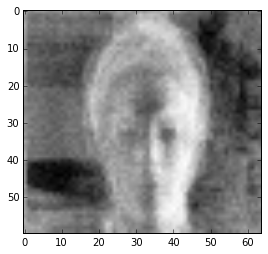

In [243]:
# Use Sanger's rule training the second principle component
Ite2 = 200
A2 = 0.00000000005
w_2 = np.random.rand(1,X)
V2 = np.zeros((Y,1))
V2 = np.dot(w_2,faces_data)

for i in range(0,Ite2-1):
    dw2 = A2*np.dot(faces_data - np.dot(w_1.T,V2)-np.dot(w_2.T,V2),V2.T)
    w_2 = w_2+dw2.T
    V2 = np.dot(w_2,faces_data)
    
w_2_2D= np.reshape(w_2,(64,60))

plt.imshow(w_2_2D.T,cmap='Greys_r')


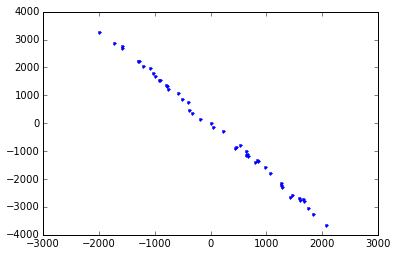

In [245]:
# Project each face onto the first 2 principle component
X_proj = np.empty([48,1])
Y_proj = np.empty([48,1])

for i in range(0,47):
    X_proj[i] = np.sum(np.multiply((faces_tmp2[:,:,i]),w_1_2D))
    Y_proj[i] = np.sum(np.multiply((faces_tmp2[:,:,i]),w_2_2D))

plt.plot(X_proj,Y_proj,'.')           


In [222]:
Y_proj

array([[ -1.34232689e+03],
       [ -1.11750784e+03],
       [  2.26205887e+03],
       [  7.84112702e+02],
       [ -8.61399227e+02],
       [  2.72324798e+03],
       [ -2.70301638e+03],
       [ -2.67592047e+03],
       [  2.02206371e+03],
       [ -1.33634703e+03],
       [ -3.69872995e+03],
       [  1.40624251e+03],
       [  1.10356182e+03],
       [ -1.57242307e+02],
       [  2.77263647e+03],
       [ -2.78508565e+03],
       [ -2.75801724e+03],
       [  1.58466119e+03],
       [ -1.59675665e+03],
       [ -1.10444835e+03],
       [  1.83805576e+03],
       [ -3.05823439e+03],
       [ -2.67031131e+03],
       [  2.05628039e+03],
       [ -1.78018837e+03],
       [ -1.40352396e+03],
       [  2.27787952e+03],
       [ -1.00804803e+03],
       [ -3.32014505e+03],
       [  8.44808942e+02],
       [  8.20071315e+01],
       [  3.89766930e+02],
       [  3.21943508e+03],
       [ -2.50767789e+02],
       [ -2.23313615e+03],
       [  1.71162439e+03],
       [ -1.15678049e+03],
 

In [203]:
b = np.sum(a)

In [204]:
b

-3159853.8433108269